<a href="https://colab.research.google.com/github/dddonghwa/IAB/blob/main/2_feature_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [OpenCV-Python Tutorial] Feature Matching

In this notebook, we will see how to extract SIFT(Scale-Invariant Feature Transform) and match SIFT features of two images with OpenCV-Python.

---

In [13]:
#3.4.2.17 또는 3.3.0.10
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.3.0.10

!wget https://raw.githubusercontent.com/bckim92/iab_practice_example/master/images/beaver.png
!wget https://raw.githubusercontent.com/bckim92/iab_practice_example/master/images/box.png
!wget https://raw.githubusercontent.com/bckim92/iab_practice_example/master/images/box_in_scene.png

ERROR: Could not find a version that satisfies the requirement opencv-contrib-python==3.3.0.10 (from versions: 3.4.2.17, 3.4.3.18, 3.4.4.19, 3.4.5.20, 3.4.6.27, 3.4.7.28, 3.4.8.29, 3.4.9.31, 3.4.9.33, 3.4.10.35, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.14.53, 3.4.15.55, 4.0.0.21, 4.0.1.23, 4.0.1.24, 4.1.0.25, 4.1.1.26, 4.1.2.30, 4.2.0.32, 4.2.0.34, 4.3.0.36, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.2.54, 4.5.3.56)
ERROR: No matching distribution found for opencv-contrib-python==3.3.0.10
--2021-09-22 12:27:49--  https://raw.githubusercontent.com/bckim92/iab_practice_example/master/images/beaver.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30625 (30K) [image/png]
Saving to: ‘beaver

In [14]:
# For python2/3 compatibility
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt
import time

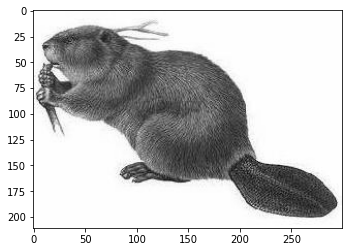

In [15]:
# Load an image
beaver = cv2.imread('./beaver.png')
plt.imshow(cv2.cvtColor(beaver, cv2.COLOR_BGR2RGB))

In [16]:
# Members of cv2.xfeatures2d
dir(cv2.xfeatures2d)

['BoostDesc_create',
 'BriefDescriptorExtractor_create',
 'DAISY_NRM_FULL',
 'DAISY_NRM_NONE',
 'DAISY_NRM_PARTIAL',
 'DAISY_NRM_SIFT',
 'DAISY_create',
 'FREAK_create',
 'HarrisLaplaceFeatureDetector_create',
 'LATCH_create',
 'LUCID_create',
 'PCTSIGNATURES_GAUSSIAN',
 'PCTSIGNATURES_HEURISTIC',
 'PCTSIGNATURES_L0_25',
 'PCTSIGNATURES_L0_5',
 'PCTSIGNATURES_L1',
 'PCTSIGNATURES_L2',
 'PCTSIGNATURES_L2SQUARED',
 'PCTSIGNATURES_L5',
 'PCTSIGNATURES_L_INFINITY',
 'PCTSIGNATURES_MINUS',
 'PCTSIGNATURES_NORMAL',
 'PCTSIGNATURES_REGULAR',
 'PCTSIGNATURES_UNIFORM',
 'PCTSignaturesSQFD_create',
 'PCTSignatures_GAUSSIAN',
 'PCTSignatures_HEURISTIC',
 'PCTSignatures_L0_25',
 'PCTSignatures_L0_5',
 'PCTSignatures_L1',
 'PCTSignatures_L2',
 'PCTSignatures_L2SQUARED',
 'PCTSignatures_L5',
 'PCTSignatures_L_INFINITY',
 'PCTSignatures_MINUS',
 'PCTSignatures_NORMAL',
 'PCTSignatures_REGULAR',
 'PCTSignatures_UNIFORM',
 'PCTSignatures_create',
 'PCTSignatures_drawSignature',
 'PCTSignatures_generate

# Extract SIFT features from an image

## 1. SIFT detector

(211, 300, 3) => (211, 300)


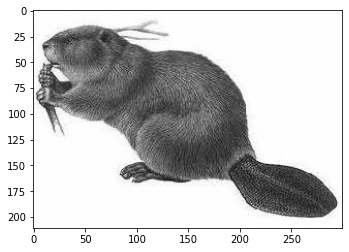

In [17]:
# Convert image color(BGR->Grayscale)
gray = cv2.cvtColor(beaver, cv2.COLOR_BGR2GRAY)
# You can convert the image when calling cv2.imread()
# gray = cv2.imread('./beaver.png', cv2.IMREAD_GRAYSCALE)

print(str(beaver.shape) + " => " + str(gray.shape))
plt.imshow(gray, cmap='gray')

In [18]:
# SIFT feature detector/descriptor
sift = cv2.xfeatures2d.SIFT_create()

error: ignored

In [ ]:
# SIFT feature detection
start_time = time.time()
kp = sift.detect(gray, None) # 2nd pos argument is a mask indicating a part of image to be searched in
#kp = sift.detect(beaver, None) # 2nd pos argument is a mask indicating a part of image to be searched in
print('Elapsed time: %.6fs' % (time.time() - start_time))

In [ ]:
# Display the SIFT features
beaver_sift = cv2.drawKeypoints(beaver, kp, None)
plt.imshow(cv2.cvtColor(beaver_sift, cv2.COLOR_BGR2RGB))

In [ ]:
# Display the rich SIFT features
beaver_sift2 = cv2.drawKeypoints(beaver, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cv2.cvtColor(beaver_sift2, cv2.COLOR_BGR2RGB))

In [ ]:
# Inspect the keypoints
print(type(kp))
print(len(kp))

In [ ]:
print(type(kp[0]))
print(dir(kp[0]))

In [ ]:
# A keypoint's property
# kp is sorted by scale of the keypoints
print(kp[-1].angle) # Orientation
print(kp[-1].class_id)
print(kp[-1].octave)
print(kp[-1].pt) # Position
print(kp[-1].response)
print(kp[-1].size) # Scale

## 2. Extract SIFT descriptor

In [ ]:
# Extract SIFT feature from the (gray) image and detected keypoints
start_time = time.time()
kp, des = sift.compute(gray, kp)
print('Elapsed time: %.6fs' % (time.time() - start_time))

# SIFT keypoints and descriptors at the same time
# start_time = time.time()
# kp, des = sift.detectAndCompute(gray, None)
# print('Elapsed time: %.6fs' % (time.time() - start_time))

In [ ]:
# Inspect the descriptors
print(type(des))
print(des.shape)
print(des.dtype)

In [ ]:
print(len(des[0, :]))
print(des[0, :])

---

# Feature Matching

## 1. SIFT Feature Matching

In [ ]:
# Open and show images
img1 = cv2.imread('./box.png')
img2 = cv2.imread('./box_in_scene.png')

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [ ]:
# SIFT feature extracting
sift = cv2.xfeatures2d.SIFT_create()
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

start_time = time.time()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)
print('Elapsed time: %.6fs' % (time.time() - start_time))

print('Image 1 - %d feature detected' % des1.shape[0])
print('Image 2 - %d feature detected' % des2.shape[0])

In [ ]:
# BFMatcher(Brute Force Matcher) with defalut setting
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des1, des2, k=2)
print('%d matches' % len(matches))

In [ ]:
# Inspect matcher results
print(type(matches))
print(len(matches))
print(type(matches[0]))
print(len(matches[0]))  # Number of match candidate = k

In [ ]:
print(type(matches[0][0]))
print(dir(matches[0][0]))

In [ ]:
print(matches[0][0].distance)
print(matches[0][0].queryIdx)
print(matches[0][0].trainIdx)
print(matches[0][0].imgIdx)
print(matches[0][1].distance)
print(matches[0][1].queryIdx)
print(matches[0][1].trainIdx)
print(matches[0][1].imgIdx)

In [ ]:
# Apply ratio test as in David Rowe's paper
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)
print('%d matches' % len(good_matches))

In [ ]:
# Display matches
img3 = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))